Covid-19 Data Analysis and Visualization.

Dataset - [Covid-19 Dataset](https://www.kaggle.com/datasets/anandhuh/latest-covid19-india-statewise-data/code)

Importing necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset.

In [2]:
covid = pd.read_csv(r'C:\Users\Asus\Desktop\Python_Programs\Github_MiniProject\Covid-19_EDA\covid_19_india.csv',sep=',')
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


9 columns with 18110 entries

Type int64 columns

1. sno - serial number 

2. cured, deaths and confirmed - shows the number of corresponding patients.

Type Object columns

1. Date, Time, State/ UT, Nationality - Indian/ NRI

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
covid.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


Data Cleaning

1. no duplicates in our dataset

2. sno indicates unique serial numbers given to each patients. - there are no duplicates -> covid[covid['Sno'].duplicated() == True]
set sno as index - for easy analysis

In [5]:
covid = covid.set_index('Sno')
covid

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462


Cleaning the state column

In [6]:
unique_states = covid['State/UnionTerritory'].unique()
unique_states

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [7]:
covid['State/UnionTerritory'] = covid['State/UnionTerritory'].str.rstrip('*')

In [8]:
replace_list = ['Himanchal Pradesh','Karanataka','Telengana']
replace_with = ['Himachal Pradesh','Karnataka','Telangana']
covid['State/UnionTerritory'] = covid['State/UnionTerritory'].replace(replace_list,replace_with)

dtype('<M8[ns]') alias for datetime64[ns]

'<M8[ns]' - machine level representation - M = datetime object, 8 = 8 bytes (64 bits), [ns] - nanosecond precision

In [9]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid['Date'].dtype  

dtype('<M8[ns]')

Data Analysis Tasks - 

1. Cumulative number of case grouped by date

In [10]:
covid.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

Inferences - 

1. First case of Novel Corona in India was reported on Jan 30th, 2020. The comfirmed case also raised as the days moved by.

2. First death was reported on 13th March,2020 with death rate being 2. By this time, we have total of 84 confirmed cases and 10 cured cases.

In [11]:
overall_description = covid.groupby('Date')[['Cured','Deaths','Confirmed']].aggregate('sum')
overall_description.head(5)

,Cured,Deaths,Confirmed
Date,,,
2020-01-30,0,0,1
2020-01-31,0,0,1
2020-02-01,0,0,2
2020-02-02,0,0,3
2020-02-03,0,0,3


In [12]:
print(f"First case Confirmed on -\n{overall_description['Confirmed'].head(1)} ")

First case Confirmed on -
Date
2020-01-30    1
Name: Confirmed, dtype: int64 


In [13]:
print(f"First Death Occured on - ")
first_death = overall_description[
    overall_description['Deaths']>=1
]['Deaths'].idxmin()    #timestamp type

print(f"{first_death.date()} \nDeath Rate - {overall_description[overall_description['Deaths']>1]['Deaths'].iloc[1]}")

First Death Occured on - 
2020-03-13 
Death Rate - 2


In [14]:
print(f"Number of cases cured as on {first_death.date()}")

cured = covid[covid['Date'].dt.date == first_death.date()]['Cured']
print(cured.sum())

Number of cases cured as on 2020-03-13
3


In [15]:
death_rate = covid.groupby('Date').agg({'Deaths':'sum'})
death_rate = death_rate[death_rate['Deaths']>=1].reset_index().rename(columns={'Deaths':'No. of Deaths'})

death_rate['Cummulative Death Rate'] = death_rate['No. of Deaths'].cumsum()

death_rate.head(10)

,Date,No. of Deaths,Cummulative Death Rate
0,2020-03-13,1,1
1,2020-03-14,2,3
2,2020-03-15,2,5
3,2020-03-16,2,7
4,2020-03-17,3,10
5,2020-03-18,3,13
6,2020-03-19,4,17
7,2020-03-20,4,21
8,2020-03-21,4,25
9,2020-03-22,7,32


2. Total cases in India and each of its states and union territories

In [16]:
#total cases include all cases - dead, confirmed and cured
covid.head(5)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [17]:
statewise = covid.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed']].agg('sum')

statewise['Overall'] = statewise.sum(axis=1)

statewise.reset_index(inplace=True)
print(f"Total cases in each State/UT in India ")
statewise[['State/UnionTerritory','Overall']]


Total cases in each State/UT in India 


,State/UnionTerritory,Overall
0,Andaman and Nicobar Islands,3813920
1,Andhra Pradesh,765798650
2,Arunachal Pradesh,13791855
3,Assam,193154014
4,Bihar,261299792
5,Cases being reassigned to states,345565
6,Chandigarh,21123356
7,Chhattisgarh,317449546
8,Dadra and Nagar Haveli,41082
9,Dadra and Nagar Haveli and Daman and Diu,3781396


<Axes: xlabel='Overall', ylabel='State/UnionTerritory'>

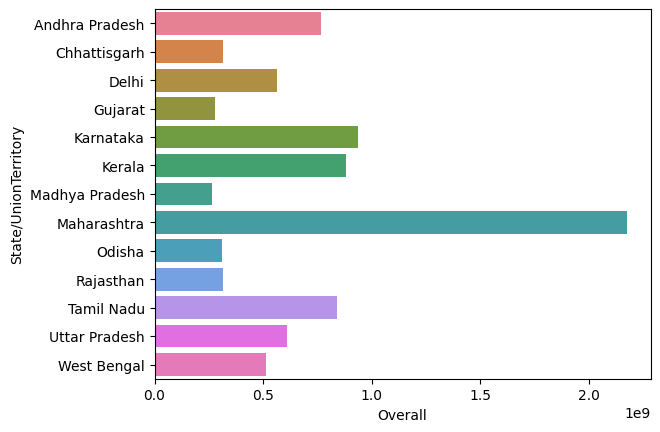

In [18]:
data = statewise[statewise['Overall']>=statewise['Overall'].mean()]

sns.barplot(data, x='Overall',y='State/UnionTerritory',hue='State/UnionTerritory')

3. Non-cumulative number of cases grouped by date

In [19]:
statewise_date_cummulative = covid.groupby(['State/UnionTerritory','Date'])[['Cured','Deaths','Confirmed']].agg('sum')
statewise_date_cummulative

Cured  Deaths  Confirmed
State/UnionTerritory        Date                                  
Andaman and Nicobar Islands 2020-03-26        0       0          1
                            2020-03-27        0       0          1
                            2020-03-28        0       0          6
                            2020-03-29        0       0          9
                            2020-03-30        0       0          9
...                                         ...     ...        ...
West Bengal                 2021-08-07  1503535   18202    1532379
                            2021-08-08  1504326   18217    1533128
                            2021-08-09  1505089   18229    1533803
                            2021-08-10  1505808   18240    1534360
                            2021-08-11  1506532   18252    1534999

[18110 rows x 3 columns]

4. Total cases per million people in India and each of its states and union territories (1 million = 10 lakhs)

In [20]:
def cases_per_million(case_individual):
    return round(case_individual/100000,)

statewise_million = statewise['Overall'].apply(cases_per_million)
statewise['Case per Millions'] = statewise_million

statewise.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Overall,Case per Millions
0,Andaman and Nicobar Islands,1848286,27136,1938498,3813920,38
1,Andhra Pradesh,370426530,2939367,392432753,765798650,7658
2,Arunachal Pradesh,6588149,26799,7176907,13791855,138
3,Assam,92678680,638323,99837011,193154014,1932
4,Bihar,126525370,1112347,133662075,261299792,2613


<Axes: xlabel='Case per Millions', ylabel='State/UnionTerritory'>

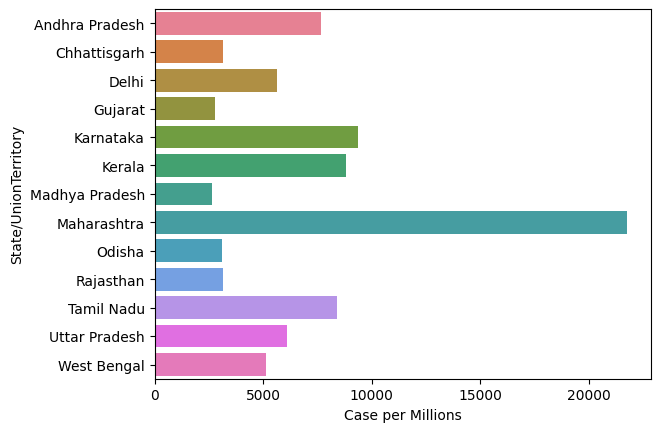

In [21]:
data = statewise[statewise['Overall']>statewise['Overall'].mean()]

sns.barplot(data, y='State/UnionTerritory', x='Case per Millions', hue='State/UnionTerritory')

5. Correlation between population (or, population density) and total positive cases

    series1.corr(series2) - we have 99.997% correlation between population density and positive cases.

    which means 99% of the population in each state has been affected by the virus - the degree of diesease vary per individual

In [22]:
population_density = pd.read_csv(r'C:\Users\Asus\Desktop\Python_Programs\Github_MiniProject\Covid-19_EDA\\population_india_census2011.csv',
                                 sep=',', index_col='State / Union Territory')

In [23]:
population_density.head()

,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio
State / Union Territory,,,,,,,
Uttar Pradesh,1,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
Maharashtra,2,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
Bihar,3,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
West Bengal,4,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
Madhya Pradesh,5,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [24]:
density = population_density['Density'].str.split('/km2')

for i in range(0,36):
    population_density['Density'].iloc[i] = density[i][0]

population_density

C:\Users\Asus\AppData\Local\Temp\ipykernel_2816\3014507450.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  population_density['Density'].iloc[i] = density[i][0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_2816\3014507450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_density['Density'].iloc[i] = density[i][0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_2816\3014507450.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio
State / Union Territory,,,,,,,
Uttar Pradesh,1,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)",828,912
Maharashtra,2,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365,929
Bihar,3,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102",918
West Bengal,4,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029",953
Madhya Pradesh,5,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236,931
Tamil Nadu,6,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)",555,996
Rajasthan,7,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201,928
Karnataka,8,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319,973
Gujarat,9,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308,919


In [25]:
population_density['Density'] = population_density['Density'].str.replace(r'[,.]','',regex=True)
population_density['Density'] = population_density['Density'].astype('int64')

<Axes: xlabel='Density', ylabel='State / Union Territory'>

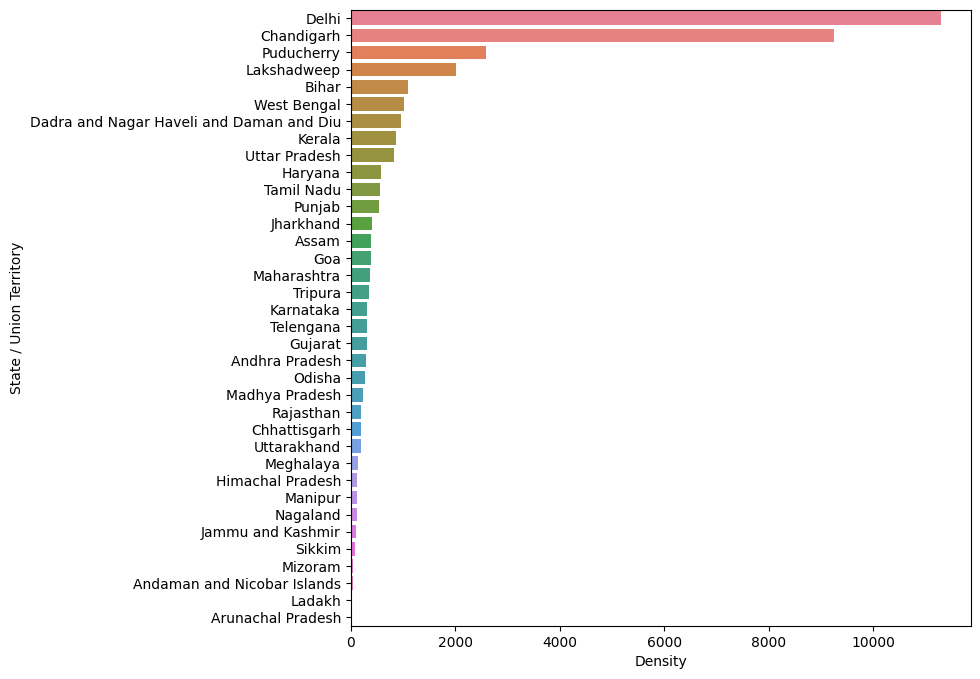

In [34]:
fig = plt.figure(figsize=(8,8))
sns.barplot(data=population_density.sort_values('Density',ascending=False), y='State / Union Territory', x='Density',
            hue='State / Union Territory')



In [35]:
statewise = pd.merge(statewise,population_density[['Density','Population']],
                    left_on='State/UnionTerritory',right_on='State / Union Territory',how='left')

In [36]:
statewise.set_index('State/UnionTerritory',inplace=True)

In [ ]:
statewise.corr()

,Cured,Deaths,Confirmed,Overall,Case per Millions,Density,Population
Cured,1.000000,0.925623,0.999850,0.999937,0.999936,0.021424,0.616932
Deaths,0.925623,1.000000,0.928884,0.928693,0.928696,0.038997,0.528020
Confirmed,0.999850,0.928884,1.000000,0.999974,0.999974,0.015896,0.612176
Overall,0.999937,0.928693,0.999974,1.000000,1.000000,0.018749,0.614066
Case per Millions,0.999936,0.928696,0.999974,1.000000,1.000000,0.018748,0.614050
Density,0.021424,0.038997,0.015896,0.018749,0.018748,1.000000,-0.105059
Population,0.616932,0.528020,0.612176,0.614066,0.614050,-0.105059,1.000000


<Axes: >

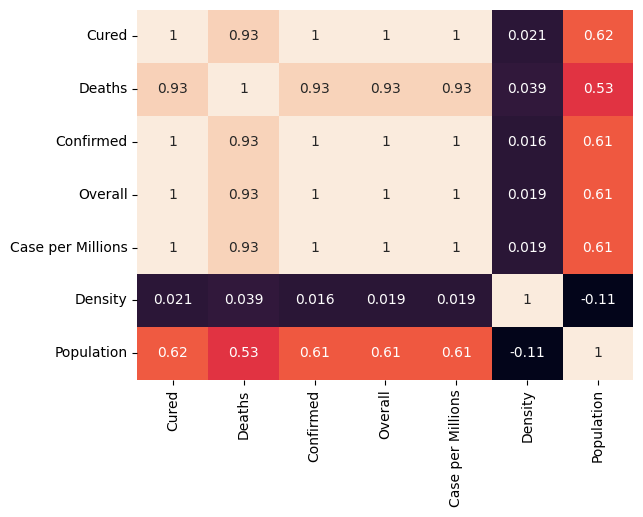

In [43]:
sns.heatmap(statewise.corr(),annot=True,cbar=False)

In [44]:
statewise.corr()[['Deaths']]

,Deaths
Cured,0.925623
Deaths,1.000000
Confirmed,0.928884
Overall,0.928693
Case per Millions,0.928696
Density,0.038997
Population,0.528020


<Axes: >

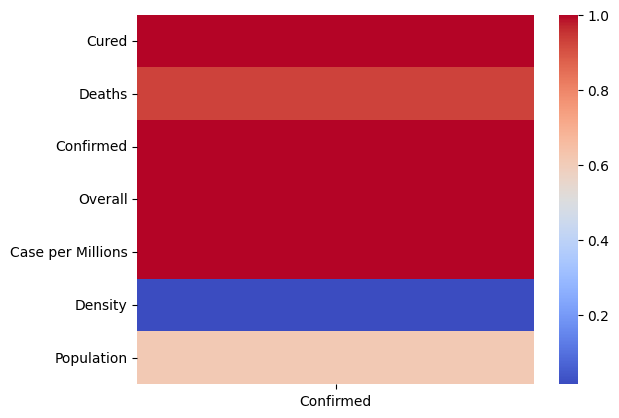

In [54]:
#individual correlation

sns.heatmap(statewise.corr()[['Confirmed']], cmap='coolwarm')

1. Population and Cured cases have positive correlation - 
2. Population vs Deaths moderately positive correlation
3. Population vs Confirmed cases positive correlation

In [ ]:
statewise.corr().iloc[:3, 6] #taking only the population column

Cured        0.616932
Deaths       0.528020
Confirmed    0.612176
Name: Population, dtype: float64

Age related Analysis

1. Age distribution of positive cases in India and each of its states and union territories

In [56]:
age_group_details = pd.read_csv(r'C:\\Users\Asus\Desktop\\Python_Programs\\Github_MiniProject\\Covid-19_EDA\\AgeGroupDetails.csv',sep=',')
age_group_details

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


<Axes: xlabel='AgeGroup', ylabel='TotalCases'>

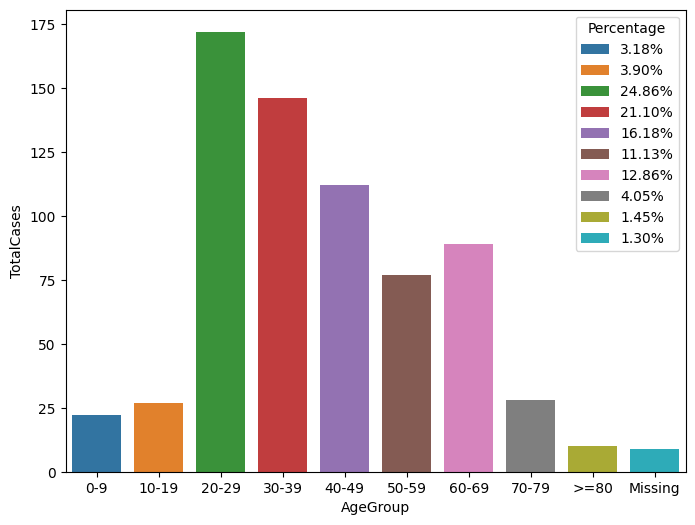

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(age_group_details, x='AgeGroup', y='TotalCases', hue='Percentage')

2. States/Union territories and districts with the highest and the lowest number of confirmed COVID-19 cases

In [ ]:
print(f"State/Union Territory with highest confirmed cases - \n{statewise['Confirmed'].sort_values().tail(1)}")
print()
print(f"State/Union Territory with highest confirmed cases - \n{statewise['Confirmed'].sort_values().head(1)}")

State/Union Territory with highest confirmed cases - 
State/UnionTerritory
Maharashtra    1127721063
Name: Confirmed, dtype: int64

State/Union Territory with highest confirmed cases - 
State/UnionTerritory
Daman & Diu    2
Name: Confirmed, dtype: int64


In [ ]:
statewise.head(10)

,Cured,Deaths,Confirmed,Overall,Case per Millions,Density,Population
State/UnionTerritory,,,,,,,
Andaman and Nicobar Islands,1848286,27136,1938498,3813920,38,46.0,380581.0
Andhra Pradesh,370426530,2939367,392432753,765798650,7658,303.0,49577103.0
Arunachal Pradesh,6588149,26799,7176907,13791855,138,17.0,1383727.0
Assam,92678680,638323,99837011,193154014,1932,397.0,31205576.0
Bihar,126525370,1112347,133662075,261299792,2613,1102.0,104099452.0
Cases being reassigned to states,0,0,345565,345565,3,NaN,NaN
Chandigarh,10117035,147694,10858627,21123356,211,9252.0,1055450.0
Chhattisgarh,151609364,2063920,163776262,317449546,3174,189.0,25545198.0
Dadra and Nagar Haveli,20352,8,20722,41082,0,NaN,NaN


In [ ]:
covid.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


<Axes: title={'center': 'Confirmed Cases in each State'}, xlabel='Confirmed', ylabel='State/UnionTerritory'>

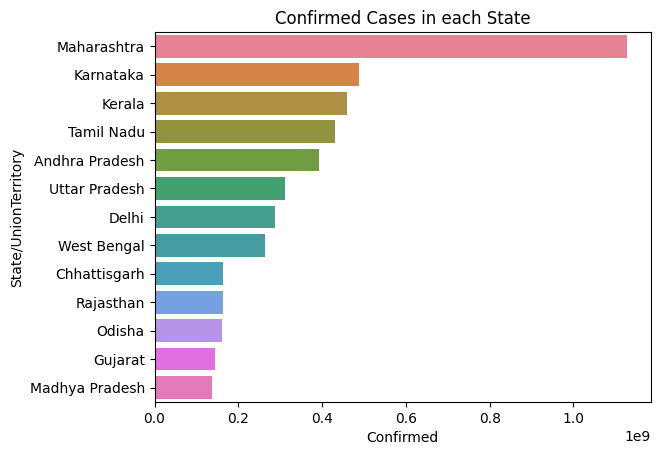

In [ ]:
data = statewise[statewise['Confirmed']>statewise['Confirmed'].mean()]

#plt.figure(figsize=(6,8))

plt.title("Confirmed Cases in each State")
sns.barplot(data.sort_values('Confirmed',ascending=False), y='State/UnionTerritory', x='Confirmed', orient='h', hue='State/UnionTerritory')



In [ ]:
statewise_sort_1 = statewise.sort_values('Cured',ascending=False)
data = statewise_sort_1[statewise_sort_1['Cured']>statewise_sort_1['Cured'].mean()]


Text(0.5, 1.0, 'Cured cases in each state')

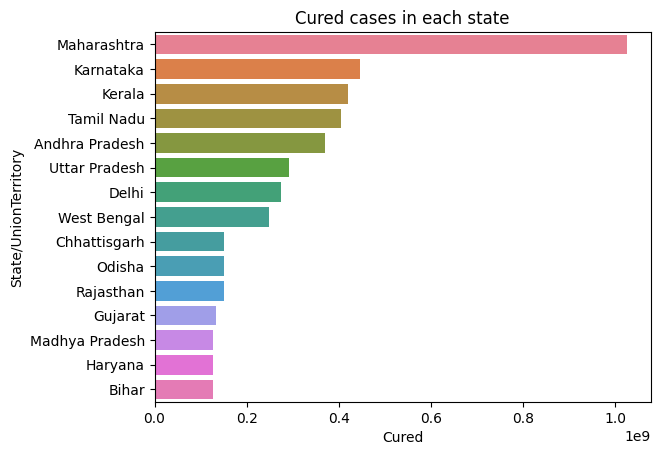

In [ ]:
sns.barplot(data, orient='h', x='Cured' , y='State/UnionTerritory', hue='State/UnionTerritory')

plt.title("Cured cases in each state")
#data = dataset, x,y - the parameters to plot, hue - categorical column
#hue parameter when given will given different colors to unique categorical value in it - will perform group by automatically

(11, 7)

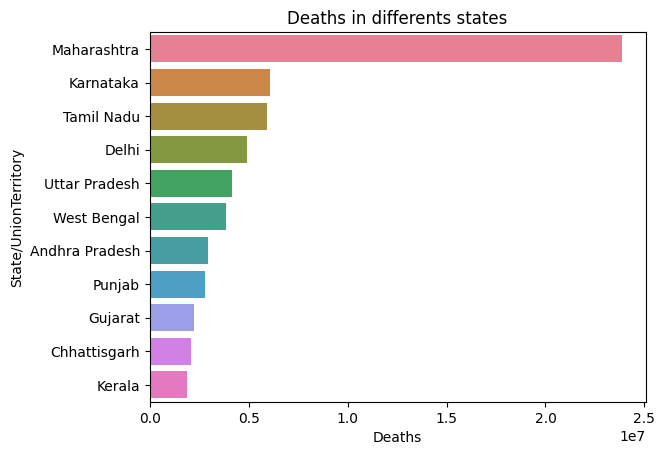

In [ ]:
data = statewise[statewise['Deaths']>statewise['Deaths'].mean()]

sns.barplot(data.sort_values('Deaths',ascending=False), x='Deaths', y='State/UnionTerritory', orient='h',hue='State/UnionTerritory')
plt.title("Deaths in differents states")
data.shape